In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('flights.csv')

In [4]:
df.sample(3)

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
158322,158322,2013,3,24,1840.0,1840,0.0,2130.0,2205,-35.0,...,1643,N3769L,JFK,SEA,313.0,2422,18,40,2013-03-24 18:00:00,Delta Air Lines Inc.
285487,285487,2013,8,6,1947.0,1935,12.0,2301.0,2302,-1.0,...,87,N678DL,JFK,SLC,281.0,1990,19,35,2013-08-06 19:00:00,Delta Air Lines Inc.
9539,9539,2013,1,11,1746.0,1745,1.0,2123.0,2120,3.0,...,177,N319AA,JFK,SFO,365.0,2586,17,45,2013-01-11 17:00:00,American Airlines Inc.


In [5]:
df.shape

(336776, 21)

In [6]:
df.columns

Index(['id', 'year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'name'],
      dtype='object')

In [7]:
df.isnull().sum()

id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

In [8]:
df1 = df.copy()

main_columns = ['origin', 'dest','distance','air_time','name']

df1 = df1[main_columns]

In [9]:
df1.shape

(336776, 5)

In [10]:
# df2 has ony 30000 data (for unscaled)
df2 = df1.iloc[:30000].copy()

In [11]:
df2.shape

(30000, 5)

In [12]:
df2.sample()

,origin,dest,distance,air_time,name
4994,JFK,BUF,301,61.0,JetBlue Airways


In [13]:
df1.head()

,origin,dest,distance,air_time,name
0,EWR,IAH,1400,227.0,United Air Lines Inc.
1,LGA,IAH,1416,227.0,United Air Lines Inc.
2,JFK,MIA,1089,160.0,American Airlines Inc.
3,JFK,BQN,1576,183.0,JetBlue Airways
4,LGA,ATL,762,116.0,Delta Air Lines Inc.


In [14]:
'''
gf: This represents a NetworkX graph object that is created using the from_pandas_edgelist function. This function converts the DataFrame  into a graph . In this specific case, the graph is created from the DataFrame assuming that the 'origin' column represents the source nodes, the 'dest' column represents the target nodes, and additional attributes (if any) are included as edge attributes.
'''

"\ngf: This represents a NetworkX graph object that is created using the from_pandas_edgelist function. This function converts the DataFrame  into a graph . In this specific case, the graph is created from the DataFrame assuming that the 'origin' column represents the source nodes, the 'dest' column represents the target nodes, and additional attributes (if any) are included as edge attributes.\n"

In [15]:
import networkx as nx

gf2 = nx.from_pandas_edgelist(df2, source = 'origin', target = 'dest', edge_attr=True)

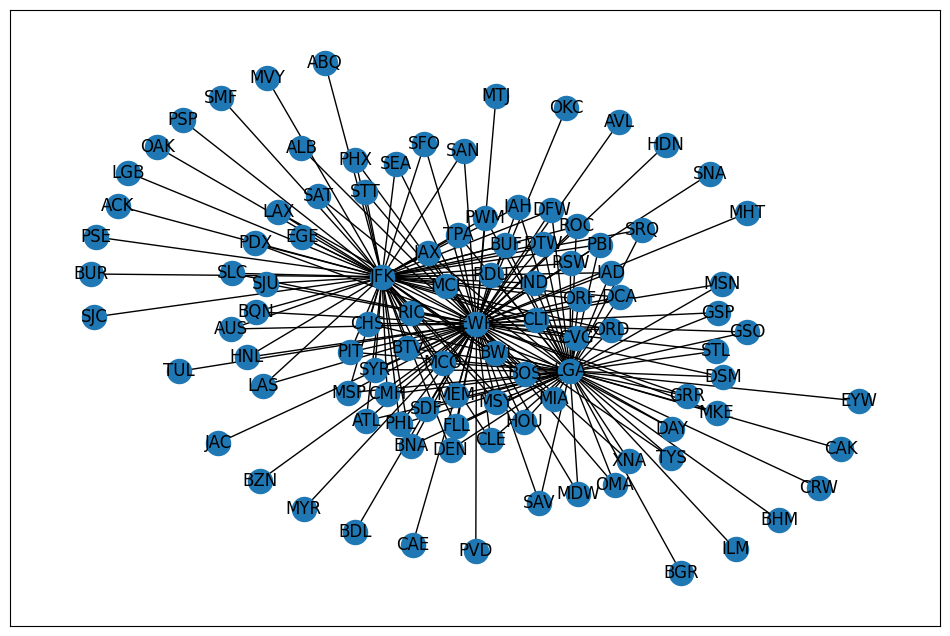

In [16]:
plt.figure(figsize=(12,8))
nx.draw_networkx(gf2, with_labels=True)
plt.show()

In [17]:
sdd_unscaled = nx.dijkstra_path(gf2, source = 'OAK', target='CAK', weight = 'air_time')
sdd_unscaled

['OAK', 'JFK', 'PHL', 'LGA', 'CAK']

In [18]:
total_weight = nx.dijkstra_path_length(gf2, source='OAK', target='CAK', weight='air_time')
total_weight

477.0

In [19]:
sat_unscaled = nx.astar_path(gf2, source= 'OAK', target= 'CAK', weight = 'air_time')
sat_unscaled

# now, the result did differ (scaled vs unscaled) - > Analysis of A star algorithm needs to be done and compared with the scaled version. In which version, did the algorithm, performed better than other is the question.

['OAK', 'JFK', 'PHL', 'LGA', 'CAK']

In [20]:
total_weight_astar_unscaled = nx.astar_path_length(gf2, source='OAK', target='CAK', weight='air_time')
total_weight_astar_unscaled

477.0

In [21]:
# Calculating all-pairs shortest paths using Floyd-Warshall algorithm
all_shortest_paths_unscaled = nx.floyd_warshall(gf2, weight='air_time')

# Print the shortest path from OAK to CAK
shortest_path_OAK_CAK_unscaled = all_shortest_paths_unscaled['OAK']['CAK']
shortest_path_OAK_CAK_unscaled
# scalability issues found here too -> Flyod Marshall

477.0

In [22]:
# Finding the shortest path using bidirectional Dijkstra's algorithm

bdj_unscaled = nx.bidirectional_dijkstra(gf2, source='OAK', target='CAK', weight='air_time')
bdj_unscaled

(477.0, ['OAK', 'JFK', 'PHL', 'LGA', 'CAK'])

In [23]:
'''When you work with a subset of 30,000 rows compared to the full dataset of 300,000 rows, the edge weights (in this case, 'air_time') associated with the connections between the same set of nodes (airports) might differ. The subset might not include all the original edges or might include different instances of the same edges with different weights.
For example, the full dataset might have multiple entries for flights between 'OAK' and 'JFK' with varying air times, and the subset might only include a longer or shorter flight time among those.'''

"When you work with a subset of 30,000 rows compared to the full dataset of 300,000 rows, the edge weights (in this case, 'air_time') associated with the connections between the same set of nodes (airports) might differ. The subset might not include all the original edges or might include different instances of the same edges with different weights.\nFor example, the full dataset might have multiple entries for flights between 'OAK' and 'JFK' with varying air times, and the subset might only include a longer or shorter flight time among those."

In [24]:
# The code below is for the scaled version of the dataset i.e having more than 3 lakh rows. Above this the code for 30,000 rows

In [25]:

gf = nx.from_pandas_edgelist(df1, source = 'origin', target = 'dest', edge_attr=True)

In [26]:
gf.nodes()

NodeView(('EWR', 'IAH', 'LGA', 'JFK', 'MIA', 'BQN', 'ATL', 'ORD', 'FLL', 'IAD', 'MCO', 'PBI', 'TPA', 'LAX', 'SFO', 'DFW', 'BOS', 'LAS', 'MSP', 'DTW', 'RSW', 'SJU', 'PHX', 'BWI', 'CLT', 'BUF', 'DEN', 'SNA', 'MSY', 'SLC', 'XNA', 'MKE', 'SEA', 'ROC', 'SYR', 'SRQ', 'RDU', 'CMH', 'JAX', 'CHS', 'MEM', 'PIT', 'SAN', 'DCA', 'CLE', 'STL', 'MYR', 'JAC', 'MDW', 'HNL', 'BNA', 'AUS', 'BTV', 'PHL', 'STT', 'EGE', 'AVL', 'PWM', 'IND', 'SAV', 'CAK', 'HOU', 'LGB', 'DAY', 'ALB', 'BDL', 'MHT', 'MSN', 'GSO', 'CVG', 'BUR', 'RIC', 'GSP', 'GRR', 'MCI', 'ORF', 'SAT', 'SDF', 'PDX', 'SJC', 'OMA', 'CRW', 'OAK', 'SMF', 'TUL', 'TYS', 'OKC', 'PVD', 'DSM', 'PSE', 'BHM', 'CAE', 'HDN', 'BZN', 'MTJ', 'EYW', 'PSP', 'ACK', 'BGR', 'ABQ', 'ILM', 'MVY', 'SBN', 'LEX', 'CHO', 'TVC', 'ANC'))

In [27]:
gf.edges()

EdgeView([('EWR', 'IAH'), ('EWR', 'ORD'), ('EWR', 'FLL'), ('EWR', 'SFO'), ('EWR', 'LAS'), ('EWR', 'PBI'), ('EWR', 'MIA'), ('EWR', 'ATL'), ('EWR', 'PHX'), ('EWR', 'MSP'), ('EWR', 'LAX'), ('EWR', 'CLT'), ('EWR', 'IAD'), ('EWR', 'SNA'), ('EWR', 'TPA'), ('EWR', 'RSW'), ('EWR', 'SJU'), ('EWR', 'SEA'), ('EWR', 'DFW'), ('EWR', 'DEN'), ('EWR', 'MCO'), ('EWR', 'BOS'), ('EWR', 'JAX'), ('EWR', 'CHS'), ('EWR', 'MEM'), ('EWR', 'MYR'), ('EWR', 'JAC'), ('EWR', 'RDU'), ('EWR', 'DTW'), ('EWR', 'SAN'), ('EWR', 'MDW'), ('EWR', 'STT'), ('EWR', 'CLE'), ('EWR', 'EGE'), ('EWR', 'DCA'), ('EWR', 'AVL'), ('EWR', 'STL'), ('EWR', 'BUF'), ('EWR', 'IND'), ('EWR', 'MKE'), ('EWR', 'PWM'), ('EWR', 'SAV'), ('EWR', 'SYR'), ('EWR', 'CMH'), ('EWR', 'ROC'), ('EWR', 'BWI'), ('EWR', 'BTV'), ('EWR', 'DAY'), ('EWR', 'HOU'), ('EWR', 'ALB'), ('EWR', 'BDL'), ('EWR', 'SLC'), ('EWR', 'PIT'), ('EWR', 'HNL'), ('EWR', 'MHT'), ('EWR', 'MSN'), ('EWR', 'GSO'), ('EWR', 'CVG'), ('EWR', 'AUS'), ('EWR', 'RIC'), ('EWR', 'GSP'), ('EWR', 'GRR')

In [28]:

# Assuming gf is your NetworkX graph object
# Total number of unique nodes in the graph
num_nodes = nx.number_of_nodes(gf)
print("Total number of nodes:", num_nodes)

# Total number of edges in the graph
num_edges = nx.number_of_edges(gf)
print("Total number of edges:", num_edges)


Total number of nodes: 107
Total number of edges: 224


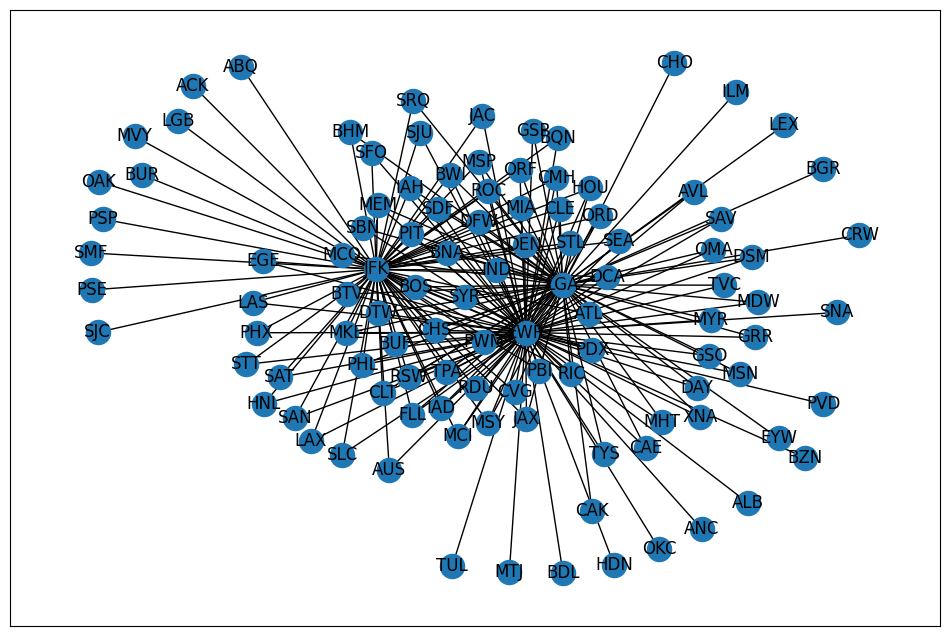

In [29]:
plt.figure(figsize=(12,8))
nx.draw_networkx(gf, with_labels=True)
plt.show()

In [30]:
spd = nx.dijkstra_path(gf, source = 'OAK', target='CAK', weight = 'air_time')

In [31]:
spd

['OAK', 'JFK', 'PHL', 'LGA', 'CAK']

In [32]:
total_weight_djk = nx.dijkstra_path_length(gf, source='OAK', target='CAK', weight='air_time')
total_weight_djk

437.0

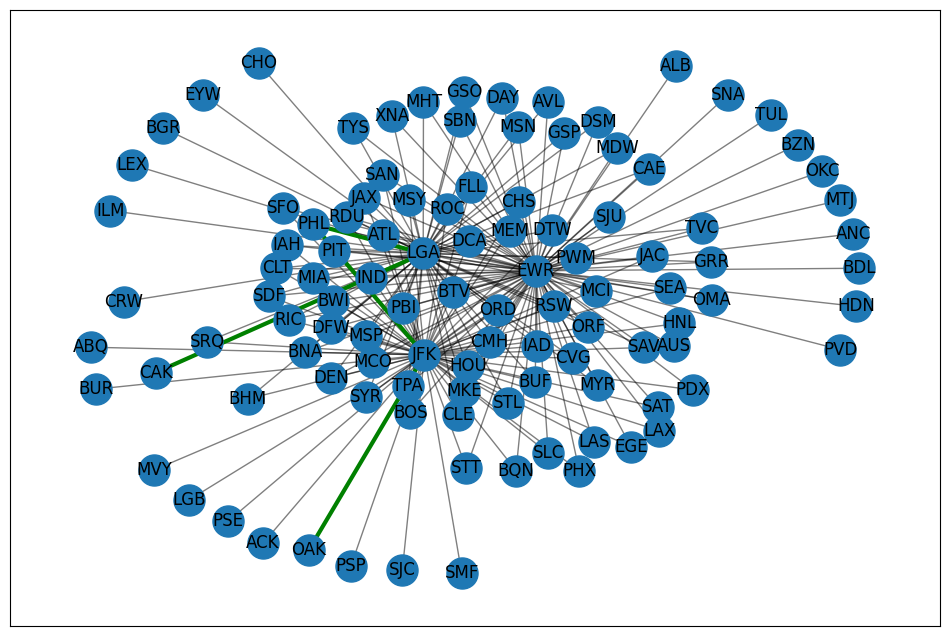

In [33]:
# Create a figure
plt.figure(figsize=(12, 8))

# Draw the network graph with bold colored edges for the shortest path
pos = nx.spring_layout(gf)  # Layout for the nodes


nx.draw_networkx_nodes(gf, pos, node_size=500)


nx.draw_networkx_edges(gf, pos, alpha=0.5)  # Draw all edges with low alpha

# Highlight edges of the shortest path
path_edges = [(spd[i], spd[i + 1]) for i in range(len(spd) - 1)]
nx.draw_networkx_edges(gf, pos, edgelist=path_edges, edge_color='g', width=3)  # Highlighted edges in green

# Draw labels
nx.draw_networkx_labels(gf, pos)

# Show the graph
plt.show()

In [34]:
'''
less distance does not necessarily mean less air time. While shorter distances usually result in shorter air times, it's not always the case. Air time can be influenced by factors such as wind speed, flight altitude, and the specific flight path taken, which may not always align perfectly with the geographical distance between airports.
'''

"\nless distance does not necessarily mean less air time. While shorter distances usually result in shorter air times, it's not always the case. Air time can be influenced by factors such as wind speed, flight altitude, and the specific flight path taken, which may not always align perfectly with the geographical distance between airports.\n"

In [35]:
sat= nx.astar_path(gf, source='OAK', target='CAK', weight='air_time')
sat

['OAK', 'JFK', 'RIC', 'LGA', 'CAK']

In [36]:
total_weight_astar = nx.astar_path_length(gf, source='OAK', target='CAK', weight='air_time')
total_weight_astar
# this performs worst in any given scenario (scaled or unscaled) But why?? INclude this in the presentation.




474.0

In [37]:
# Calculating all-pairs shortest paths using Floyd-Warshall algorithm
all_shortest_paths = nx.floyd_warshall(gf, weight='air_time')

# Print the shortest path from OAK to CAK
shortest_path_OAK_CAK = all_shortest_paths['OAK']['CAK']
shortest_path_OAK_CAK

437.0

In [38]:
# Finding the shortest path using bidirectional Dijkstra's algorithm

bdj = nx.bidirectional_dijkstra(gf, source='OAK', target='CAK', weight='air_time')



In [39]:
bdj
# same as djikstra

(437.0, ['OAK', 'JFK', 'PHL', 'LGA', 'CAK'])

In [40]:

# Conclusion
# as we saw, different algorithms might give different solutions
# analyis criteria:
# Which algo gave the  shortest path?  = >  3 algos gave same solutions 
# which algo was faster? => Left to do (Need to do this in scaled data at last)
# in what scenarios what algorithm could work best?   => For scaled , don't use A star
# etc




In [41]:
# Now, I have checked from 'OAK' to 'CAK', Now lets check from few other airports to see if the performance match

In [42]:
# Repeat the same thing as above, but now with other two airports

In [43]:
# same graph object can be used (30 k rows)

In [44]:
spd_one = nx.dijkstra_path(gf, source = 'CHO', target='PSP', weight = 'air_time')
total_weight_djk_one = nx.dijkstra_path_length(gf, source='CHO', target='PSP', weight='air_time')
print(spd_one,total_weight_djk_one)

['CHO', 'LGA', 'PHL', 'JFK', 'PSP'] 418.0


In [45]:
# Calculating all-pairs shortest paths using Floyd-Warshall algorithm
all_shortest_paths = nx.floyd_warshall(gf, weight='air_time')

shortest_path_one= all_shortest_paths['CHO']['PSP']
print( shortest_path_one)

418.0


In [46]:
bdj_one = nx.bidirectional_dijkstra(gf, source='CHO', target='PSP', weight='air_time')
print(bdj_one)

(418.0, ['CHO', 'LGA', 'PHL', 'JFK', 'PSP'])


In [47]:

# Define the heuristic function
def heuristic_distance(airport1, airport2):
    # Assuming 'distance' is the column containing the distance information in your dataframe
    distance = df.loc[(df['origin'] == airport1) & (df['dest'] == airport2), 'distance'].values
    if len(distance) > 0:
        return distance[0]  # Return the distance if it exists in the dataset
    else:
        return float('inf')  # Return infinity if distance is not available



In [48]:
# Use NetworkX's A* algorithm with heuristic
shortest_path_astar_one = nx.astar_path(gf, source='CHO', target='PSP', heuristic=heuristic_distance, weight='air_time')

print("Shortest path from CHO to PSP:", shortest_path_astar_one)


Shortest path from CHO to PSP: ['CHO', 'LGA', 'IAD', 'JFK', 'PSP']


In [49]:
total_weight_astar_one = nx.astar_path_length(gf, source='CHO', target='PSP', heuristic=heuristic_distance,weight='air_time')
total_weight_astar_one

444.0

In [78]:
# Flyod Warshall Execution time

import time
start_time = time.time()

# Calculating all-pairs shortest paths using Floyd-Warshall algorithm
all_shortest_paths_time = nx.floyd_warshall(gf, weight='air_time')
shortest_path_time= all_shortest_paths['CHO']['ABQ']
print( shortest_path_time)

end_time = time.time()
execution_time = end_time - start_time
print("Execution time of Flyod-Warshall's algorithm:", execution_time)




326.0
Execution time of Flyod-Warshall's algorithm: 0.2712678909301758


In [74]:
# Execution time of Bidirectional Djikstra
import time
start_time = time.time()

bdj_time_test = nx.bidirectional_dijkstra(gf, source='CHO', target='ABQ', weight='air_time')
print(bdj_time_test)

end_time = time.time()
execution_time = end_time - start_time
print("Execution time of Bidirectional Dijkstra's algorithm:", execution_time)



(326.0, ['CHO', 'LGA', 'PHL', 'JFK', 'ABQ'])
Execution time of Bidirectional Dijkstra's algorithm: 0.0029914379119873047


In [72]:
# Execution time of A* algorithm

import time
start_time = time.time()

shortest_path_astar_two = nx.astar_path(gf, source='CHO', target='ABQ', heuristic=heuristic_distance, weight='air_time')
total_weight_astar_two = nx.astar_path_length(gf, source='CHO', target='ABQ', heuristic=heuristic_distance,weight='air_time')

print("Shortest path from CHO to ABQ:", shortest_path_astar_two)
print("Shortest Path length from CHO to ABQ",total_weight_astar_two)

end_time = time.time()
execution_time = end_time - start_time
print("Execution time of A* algorithm:", execution_time)





Shortest path from CHO to ABQ: ['CHO', 'LGA', 'IAD', 'JFK', 'ABQ']
Shortest Path length from CHO to ABQ 352.0
Execution time of A* algorithm: 8.313992500305176


In [71]:
# execution time of Djikstra 
import time
start_time = time.time()

spd_two = nx.dijkstra_path(gf, source = 'CHO', target='ABQ', weight = 'air_time')
total_weight_djk_two = nx.dijkstra_path_length(gf, source='CHO', target='ABQ', weight='air_time')
print("Shortest Path from 'CHO' to 'ABQ':", spd_one)
print("Shortest Path Length from 'CHO' to 'ABQ':", total_weight_djk_two)

end_time = time.time()
execution_time = end_time - start_time
print("Execution time of Dijkstra's algorithm:", execution_time)


Shortest Path from 'CHO' to 'ABQ': ['CHO', 'LGA', 'PHL', 'JFK', 'PSP']
Shortest Path Length from 'CHO' to 'ABQ': 326.0
Execution time of Dijkstra's algorithm: 0.0069789886474609375


In [70]:
spd_three = nx.dijkstra_path(gf, source = 'GSO', target='LGB', weight = 'air_time')
total_weight_djk_three = nx.dijkstra_path_length(gf, source='GSO', target='LGB', weight='air_time')
print(spd_three,total_weight_djk_three)

['GSO', 'EWR', 'PHL', 'JFK', 'LGB'] 413.0


In [54]:
total_weight_astar_three = nx.astar_path_length(gf, source='GSO', target='LGB', heuristic=heuristic_distance,weight='air_time')
total_weight_astar_three

433.0

In [55]:
bdj_one = nx.bidirectional_dijkstra(gf, source='GSO', target='LGB', weight='air_time')
print(bdj_one)

(413.0, ['GSO', 'EWR', 'PHL', 'JFK', 'LGB'])


In [56]:
# Calculating all-pairs shortest paths using Floyd-Warshall algorithm
all_shortest_paths_three = nx.floyd_warshall(gf, weight='air_time')

shortest_path_three= all_shortest_paths['GSO']['LGB']
print( shortest_path_three)

413.0


In [57]:
spd_4 = nx.dijkstra_path(gf, source = 'SFO', target='AUS', weight = 'air_time')
total_weight_djk_4 = nx.dijkstra_path_length(gf, source='SFO', target='AUS', weight='air_time')
print(spd_4,total_weight_djk_4)

['SFO', 'JFK', 'AUS'] 502.0


In [58]:
total_weight_astar_4 = nx.astar_path_length(gf, source='SFO', target='AUS', heuristic=heuristic_distance,weight='air_time')
total_weight_astar_4

509.0

In [59]:
bdj_4 = nx.bidirectional_dijkstra(gf, source='SFO', target='AUS', weight='air_time')
print(bdj_4)

(502.0, ['SFO', 'JFK', 'AUS'])


In [60]:
# Calculating all-pairs shortest paths using Floyd-Warshall algorithm
all_shortest_paths_4 = nx.floyd_warshall(gf, weight='air_time')

shortest_path_4= all_shortest_paths['SFO']['AUS']
print( shortest_path_4)

502.0


In [61]:
# Running GSO to LGB, but now in small dataset
spd_3_unscaled= nx.dijkstra_path(gf2, source = 'GSO', target='LGB', weight = 'air_time')
total_weight_djk_3_unscaled = nx.dijkstra_path_length(gf, source='GSO', target='LGB', weight='air_time')
print(spd_3_unscaled,total_weight_djk_3_unscaled)

['GSO', 'EWR', 'PHL', 'JFK', 'LGB'] 413.0
